## Question 2

### Part 8.1 - Answer:

Let the concentrations of E, S, ES and P be [E], [S], [ES] and [P] respectively. <br>

$$\frac{dE}{dt} = -k_1[E][S] + k_2[ES] + k_3[ES]$$ <br>
$$\frac{dS}{dt} = -k_1[E][S] + k_2[ES]$$ <br>
$$\frac{dES}{dt} = k_1[E][S] - k_2[ES] - k_3[ES]$$ <br>
$$\frac{dP}{dt} = k_3[ES]$$

### Part 8.2 - Answer:

Initial concentration of E is 1 μM, the initial concentration of S is 10 μM, and the initial concentrations of ES and P are both 0. The rate constants are: k1 = 100/μM/min, k2=600/min, k3 =150/min. <br>

The four equations can first be simplified into two differential equations for solving. <br>

Firstly, it is assumed that the total amount of enzymes in all forms is always conserved. Hence at any given time t, the total amount of free enzymes [E]<sub>t</sub> and enzymes involved in the formation of the enzyme-substrate complex [ES]<sub>t</sub> will  always be equal to the starting enzyme concentration [E]<sub>0</sub>. Hence:<br>

$$[E]_0 = [E]_t + [ES]_t$$
$$[E]_t = [E]_0 - [ES]_t$$

Substituting this into the equations above will result as follows:<br>

$$\frac{dS_t}{dt} = -k_1([E]_0 - [ES]_t)[S]_t + k_2[ES]_t$$
$$\frac{dES_t}{dt} = k_1([E]_0 - [ES]_t)[S]_t - k_2[ES]_t -k_3[ES]_t$$

Here, the rate of change of P can also be expressed using just [ES] and [E] as well:<br>

$$\frac{dP_t}{dt} = k_3[ES]_t$$
$$\frac{dES_t}{dt} = -\frac{dS_t}{dt}-k_3[ES]_t$$
$$∴ \frac{dP_t}{dt} = -\frac{dS_t}{dt} - \frac{dES_t}{dt}$$
<br>
Integrating both sides give the following:<br>

$$[P]_t - [P]_0 = -([S]_t - [S]_0) - ([ES]_t - [ES]_0)$$
$$=> [P]_t = -[S]_t + [S]_0 - [ES]_t$$

This leaves two equations to be solved:
$$\frac{dS_t}{dt} = -k_1([E]_0 - [ES]_t)[S]_t + k_2[ES]_t$$
$$\frac{dES_t}{dt} = k_1([E]_0 - [ES]_t)[S]_t - k_2[ES]_t -k_3[ES]_t$$

The Fourth-Order Runge-Kutta method can be used to solve the differential equations. It uses 4 estimates to the slope to get an approximation of a value y(h), where time, t = h. In the context of this problem, the aim is to get approximates for [S]<sub>t</sub> and [ES]<sub>t</sub>. <br>

Let l<sub>1</sub>, l<sub>2</sub>, l<sub>3</sub> and l<sub>4</sub> be slope approximations for the S differential equation while m<sub>1</sub>, m<sub>2</sub>, m<sub>3</sub> and m<sub>4</sub> be approximations for the ES differential equation.

Slope approximations for S:
$$l_1 = f([S]_{t_i}, t_i, [ES]_{t_i})$$<br>
$$l_2 = f([S]_{t_i} + l_1\frac{h}{2}, t_i + \frac{h}{2}, [ES]_{t_i}+m_1\frac{h}{2})$$<br>
$$l_3 = f([S]_{t_i} + l_2\frac{h}{2}, t_i + \frac{h}{2}, [ES]_{t_i}+m_2\frac{h}{2})$$<br>
$$l_4 = f([S]_{t_i} + l_3h, t_i + h, [ES]_{t_i}+ m_3h)$$<br>
Estimate of [S]<sub>h</sub> (Formula represents a weighted sum of slopes, where the midpoint slopes are weighted higher than those at the endpoints since better estimates are expected:<br>

$$[S]_{i+1} = [S]_i + \frac{l_1 + 2l_2 + 2l_3 + l_4}{6}h$$<br>

Slope approximations for ES:
$$m_1 = f([ES]_{t_i}, t_0, [S]_{t_i})$$<br>
$$m_2 = f([ES]_{t_i} + m_1\frac{h}{2}, t_i + \frac{h}{2}, [S]_{t_i}+l_1\frac{h}{2})$$<br>
$$m_3 = f([ES]_{t_i} + m_2\frac{h}{2}, t_i + \frac{h}{2}, [S]_{t_i}+l_2\frac{h}{2})$$<br>
$$m_4 = f([ES]_{t_i} + m_3h, t_i + h, [S]_{t_i}+ l_3h)$$<br>

Estimate of [ES]<sub>h</sub>: <br>

$$[ES]_{i+1} = [ES]_i + \frac{m_1 + 2m_2 + 2m_3 + m_4}{6}h$$<br>

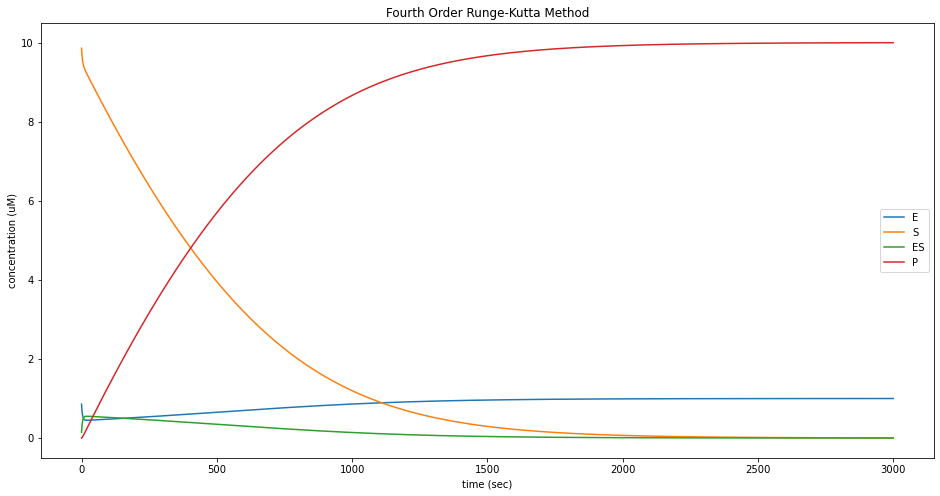

In [144]:
#import relevant packages
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

#Initialize input values
E_0 = 1
S_0 = 10
ES_0 = 0
P_0 = 0
k1 = 100/60
k2 = 600/60
k3 = 150/60

#Correct
def dsdt(ES, S, t):
    result = -k1*(E_0-ES)*S + k2*ES
    return result

#Correct
def desdt(ES, S, t):
    result= k1*(E_0-ES)*S - k2*ES -k3*ES
    return result

def RK4(ES, S, t, h):
    
    l1 = dsdt(ES, S, t)
    m1 = desdt(ES,S,t)
    
    l2 = dsdt(ES+m1*(h/2),S+l1*(h/2),t+(h/2))
    m2 = desdt(ES+m1*(h/2),S+l1*(h/2),t+(h/2))
    
    l3 = dsdt(ES+m2*(h/2),S+l2*(h/2), t+(h/2))
    m3 = desdt(ES+m2*(h/2),S+l2*(h/2), t+(h/2))
    
    l4 = dsdt(ES+m3*h,S+l3*h,t+h)
    m4 = desdt(ES+m3*h,S+l3*h,t+h)
    
    S_h = S + h*(l1 + 2*l2 + 2*l3 + l4)/6
    ES_h = ES + h*(m1 + 2*m2 + 2*m3 + m4)/6  
    
    return S_h, ES_h

#Get estimates for all
def main(ES, S, t, h):
    #Run RK4 equations
    S_h, ES_h = RK4(ES, S, t, h)
    P_h = -S_h + S_0 - ES_h
    E_h = E_0 - ES_h
    V = k3*ES_h
    
    return E_h, S_h, ES_h, P_h, V

E_conc = []
S_conc = []
ES_conc = []
P_conc = []
time = []
V_rate = []

h = 0.01
S = S_0
ES = ES_0
i = 0

for i in range(3000):
    E_h, S_h, ES_h, P_h, V = main(ES, S, i, h)
    E_conc.append(E_h)
    S_conc.append(S_h)
    ES_conc.append(ES_h)
    P_conc.append(P_h)
    V_rate.append(V)
    time.append(i)
    S = S_h
    ES = ES_h
    
#plot the graphs
figure(figsize = (16,8))
plt.plot(time, E_conc, label = "E")
plt.plot(time, S_conc, label="S")
plt.plot(time, ES_conc, label="ES")
plt.plot(time, P_conc, label="P")
plt.title('Fourth Order Runge-Kutta Method')
plt.xlabel('time (sec)')
plt.ylabel('concentration (uM)')
plt.legend()
plt.savefig('Runge-Kutta Method Plot.png')
plt.show()

### Part 8.3 - Answer:

In quasi-equilibrium analysis, the reaction of the substrate and enzyme to form the enzyme-substrate complex is assumed to be a fast reaction, hence it reaches equilibrium very quickly. (Equilibrium means that the forward and backward components of a single reaction is balanced).<br>
Hence:<br>
$$k_1[S][E] = k_2[ES]$$
$$k_1[S]([E]_0-[ES]) = k_2[ES]$$
$$k_1[S][E]_0 - k_1[S][ES] = k_2[ES]$$<br>
$$[ES] = \frac{k_1[S][E]_0}{k_1[S]+k_2}$$<br>
$$[ES] = \frac{[S][E]_0}{[S]+\frac{k_2}{k_1}}$$
<br>
The velocity of the reaction, V, is as follows, where K<sub>M</sub> = $\frac{k_2}{k1}$:<br><br>
$$V = \frac{d[P]}{dt} = k_3[ES] = \frac{k_3[S][E]_0}{[S]+ K_M}$$<br>

At large concentrations of [S], [S] is much larger than K<sub>M</sub>, hence [S] + K<sub>M</sub> ≈ [S] and V saturates to V<sub>max</sub>: <br>

$$V = \frac{k_3[S][E]_0}{[S]+ K_M} ≈ \frac{k_3[S][E]_0}{[S]} = k_3[E]_0$$<br>
$$=> V_{max} = k_3[E]_0$$



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The value of Vmax is:  1.3774615449725847


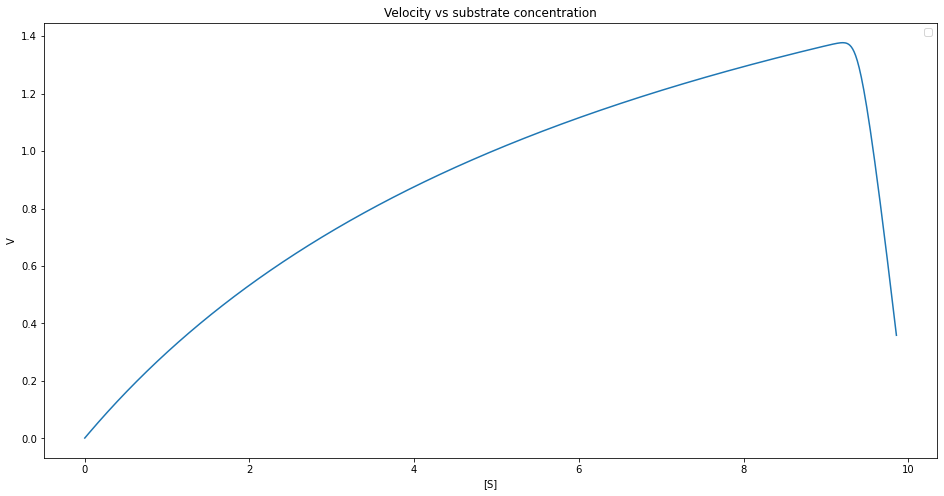

In [149]:
#plot the graphs
figure(figsize = (16,8))
plt.plot(S_conc, V_rate)
plt.title('Velocity vs substrate concentration')
plt.xlabel('[S]')
plt.ylabel('V')
plt.legend()

Vmax = max(V_rate)
print("The value of Vmax is: ",Vmax)
plt.savefig('V vs [S] plot.png')
plt.show()